# Painting Halos using a WGAN

We aim to reproduce the power spectrum results from "Painting halos from 3D dark matter fields using Wasserstein mapping networks," Doogesh Kodi Ramanah, Tom Charnock, Guilhem Lavaux. 

This work employs a network that learns how to map from approximate 3D dark matter fields to realistic halo field. The network used is based on a WGAN (GANs optimized using the Wasserstein distance) to improve the stability of GANs which reduces issues such as vanishing gradients and mode collapse.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nbodykit
from nbodykit.lab import *
import os

/project/6033532/woodfiaj/VGCC/imageMaker/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


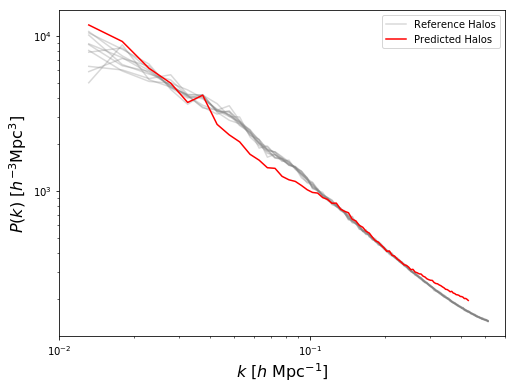

In [2]:
plt.figure(figsize=(8,6))

for i in range(10):
    inp=np.load("input/training/emulator_720box_planck_00-%d_logmass-12-14_halo_counts.npy"%i)
    mesh = ArrayMesh(inp, BoxSize=1100)
    r = FFTPower(mesh, mode='1d', dk=0.005, kmin=0.01)
    Pk = r.power
    if i ==0:
        plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'],label='Reference Halos',c='grey',alpha=0.3)
    else:
        plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'],c='grey',alpha=0.3)

train=np.load("/home/woodfiaj/projects/rrg-wperciva/woodfiaj/PHYS-449-midterm-project/results/learning_rate_tests_2/C5e-4-G1e-5_E50000/train_output.npy")
mesh = ArrayMesh(train, BoxSize=1100)
r = FFTPower(mesh, mode='1d', dk=0.005, kmin=0.01)
Pk = r.power
plt.loglog(Pk['k'], Pk['power'] - Pk.attrs['shotnoise'].real,label='Predicted Halos',color='red')

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]",fontsize=16)
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]",fontsize=16)
plt.xlim(0.01, 0.6)
plt.legend()

plt.show()

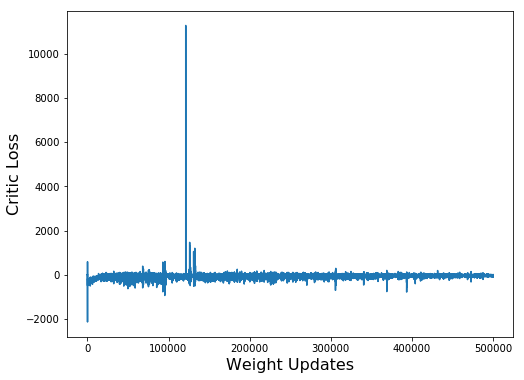

In [3]:
plt.figure(figsize=(8,6))
loss=np.loadtxt("results/learning_rate_tests_2/C5e-4-G1e-5_E50000/loss_critic.txt")
plt.plot(np.arange(len(loss)),loss)
plt.xlabel("Weight Updates",fontsize=16)
plt.ylabel("Critic Loss",fontsize=16)
plt.show()

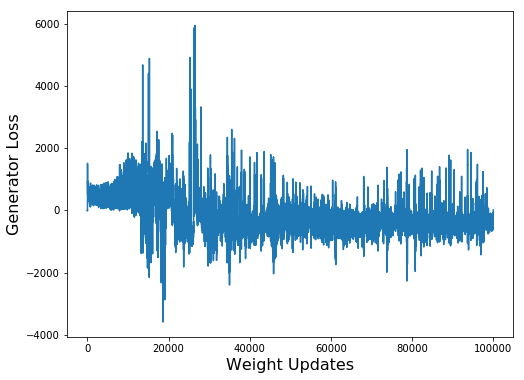

In [4]:
plt.figure(figsize=(8,6))
loss=np.loadtxt("results/learning_rate_tests_2/C5e-4-G1e-5_E50000/loss_generator.txt")
plt.plot(np.arange(len(loss)),loss)
plt.xlabel("Weight Updates",fontsize=16)
plt.ylabel("Generator Loss",fontsize=16)
plt.show()